In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *
from subprocess import call

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

### Code to add the pi0, l1 coloumn to the grid

In [18]:
# add pi 0 & l 1 to the grid SYM
def add_pi0_l1_to_sym_mesh(q1, q2):
    extSSDpath = getExternalSSDpath()
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
    fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
    xgrid_pi, ygrid_l = np.mgrid[0.0:0.5:complex(0,51), 0.0:1.0:complex(0,101)]
    fsMeshAmp = np.empty([3, 51, 101])
    # get solutions at pi == 0.0:
    pi = 0.0
    ls = ygrid_l[0]
    fsp0 = [[1.0, ], [0.0, ], [0.0, ]]
    for l in ls[1:-1]:
        call(f'python f0poly_sols_clean.py {pi} {pi} {q1} {q2} {l} -v > sols.dat', shell=True)
        sols = []
        with open('sols.dat', 'r') as file:
            for line in file.readlines():
                sols_i = [abs(float(f)) for f in line.split()]
                sols.append(sols_i)
        for i in range(3):
            fsp0[i].append(sols[1][i])
    fsp0[0].append(1/q2)
    fsp0[1].append(0.0)
    fsp0[2].append(1-1/q2)
    for i in range(3):
        fsMeshAmp[i][0] = np.array(fsp0[i])
        fsMeshAmp[i][1:,0:-1] = fsMesh['fs'][i]
    # add l 1 to the grid:
    fsMeshAmp[0][1:,-1] = np.array([1/q2]*50)
    fsMeshAmp[1][1:,-1] = np.array([0]*50)
    fsMeshAmp[2][1:,-1] = np.array([1-1/q2]*50)
    np.savez(f'{path}/map_sym_q1_{q1}_q2_{q2}_Amp_pi0_l1.npz', x=xgrid_pi, y=ygrid_l, fs=fsMeshAmp)


# add pi2, l1 to the asym grid
def add_pi20_l1_to_asym_fixPi1_mesh(pi1, q1, q2):
    extSSDpath = getExternalSSDpath()
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
    fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
    xgrid_pi2, ygrid_l = np.mgrid[0.0:0.5:complex(0,51), 0.0:1.0:complex(0,101)]
    fsMeshAmp = np.empty([3, 51, 101])
    # get solutions at pi2 == 0.0:
    pi2 = 0.0
    ls = ygrid_l[0]
    fsp0 = [[1.0/(1+pi1*q1), ], [(pi1*q1)/(1+pi1*q1), ], [0.0, ]]
    for l in ls[1:-1]:
        call(f'python f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l} -v > sols.dat', shell=True)
        sols = []
        with open('sols.dat', 'r') as file:
            for line in file.readlines():
                sols_i = [abs(float(f)) for f in line.split()]
                sols.append(sols_i)
        for i in range(3):
            fsp0[i].append(sols[1][i])
    fsp0[0].append(1/q2)
    fsp0[1].append(0.0)
    fsp0[2].append(1-1/q2)
    for i in range(3):
        fsMeshAmp[i][0] = np.array(fsp0[i])
        fsMeshAmp[i][1:,0:-1] = fsMesh['fs'][i]
    # add l 1 to the grid:
    fsMeshAmp[0][1:,-1] = np.array([1/q2]*50)
    fsMeshAmp[1][1:,-1] = np.array([0]*50)
    fsMeshAmp[2][1:,-1] = np.array([1-1/q2]*50)
    np.savez(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}_Amp_pi20_l1.npz', x=xgrid_pi2, y=ygrid_l, fs=fsMeshAmp)


[0.1, 1.0000000000000078]


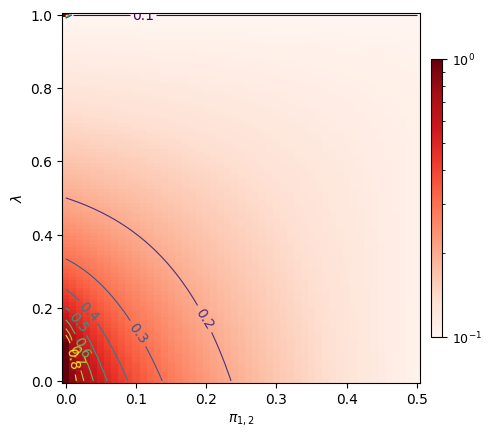

In [30]:
# single plot:
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']


fig, ax = plt.subplots(figsize=(5.6,4.8))
logColorbar = True
if logColorbar:
    # zLim = [np.min(fsMesh['fs'][0]), np.max(fsMesh['fs'][0])]
    # im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][0], cmap='Reds', shading='nearest', norm = LogNorm(vmin=zLim[0], vmax=zLim[-1]))
    zLim = [np.min(fsMeshAmp[0]), np.max(fsMeshAmp[0])]
    print(zLim)
    im = ax.pcolormesh(xgrid_pi, ygrid_l, fsMeshAmp[0], cmap='Reds', shading='nearest', norm = LogNorm(vmin=zLim[0], vmax=zLim[-1]))
else:
    im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][0], cmap='Reds', shading='nearest')
# con = ax.contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][0], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
con = ax.contour(xgrid_pi, ygrid_l, fsMeshAmp[0], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
ax.clabel(con)
ax.set_xlabel('$\pi_{1,2}$')
ax.set_ylabel('$\lambda$')
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)
cb.ax.tick_params(labelsize=9)

## fs side by side

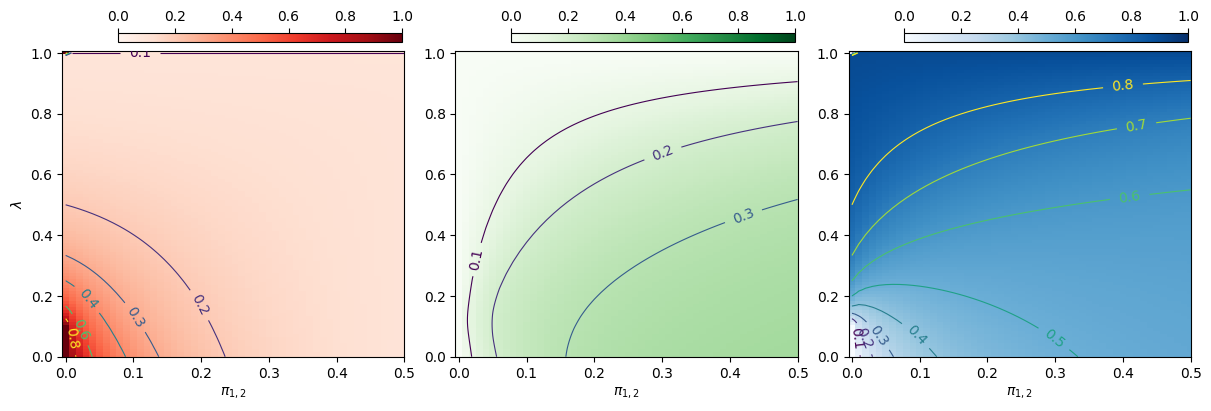

In [36]:
x = 2
q1, q2 = 9, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(1,3,figsize=(12, 4), constrained_layout=True)
fs_cmaps = ['Reds', 'Greens', 'Blues']

for i in range(3):
    # ax[i].set_xlim(0.00, 0.5)
    ax[i].set_xlim(-0.005, 0.5)
    # ax[i].set_ylim(0.00, 1.0)
    ax[i].set_ylim(0.00, 1.005)
    ax[i].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

for i,cmap in enumerate(fs_cmaps):
    # im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], vmin =0, vmax =1, cmap=cmap, shading='nearest', rasterized=True)
    # con = ax[i].contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
    im = ax[i].pcolormesh(xgrid_pi, ygrid_l, fsMeshAmp[i], vmin =0, vmax =1, cmap=cmap, shading='nearest', rasterized=True)
    if i == 0:
        con = ax[i].contour(xgrid_pi, ygrid_l, fsMeshAmp[i], levels=[0.1, 0.2, 0.3, 0.4, 0.6, 0.8], linewidths=0.8)
    else:
        con = ax[i].contour(xgrid_pi, ygrid_l, fsMeshAmp[i], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
    fig.colorbar(im, ax=ax[i], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
    ax[i].clabel(con)

fig.savefig(f'fs_cmaps_isolines_sym_pi_q1_{q1}_q2_{q2}.png')


## Consensus single plot:

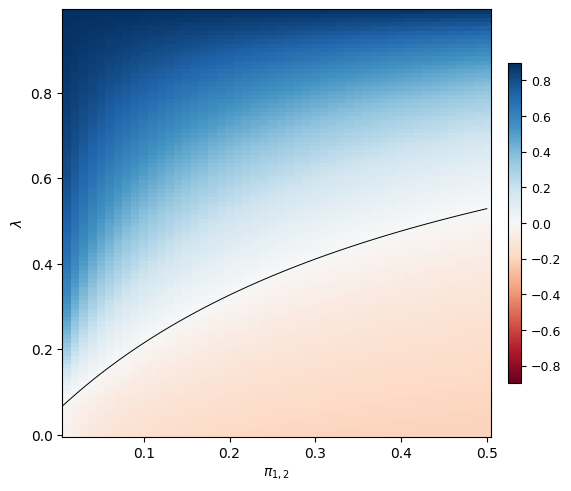

In [6]:
# single Q plot:
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(figsize=(5.6,4.8), constrained_layout=True)

# mask the region where f_0 >= 0.5:
# for i in len(fsMesh['x'][:,0]):
#     for j in len(fsMesh['y'][0,:]):
#         if fsMesh['fs'][0][i,j] >= 0.5:
#             ...
zeros = np.zeros(Qmesh.shape)
nans = np.empty(Qmesh.shape)
nans[:] = np.nan
Qmesh_masked = np.where(fsMesh['fs'][0] > 0.5, nans, Qmesh)

maxval = np.max(abs(Qmesh))
zLim = [-maxval, maxval]

im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1])
# im_masked = ax.pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh_masked, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1])
# con = ax.contour(fsMesh['x'], fsMesh['y'], Qmesh_masked, levels=[-0.8, -0.6, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8], linewidths=0.8, cmap='autumn')
# ax.clabel(con)
tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
tline = tline.query('pi >= 0.005')
ax.plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.7)
ax.set_xlabel('$\pi_{1,2}$')
ax.set_ylabel('$\lambda$')
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)
cb.ax.tick_params(labelsize=9)
# fig.savefig(f'Q_cmap_isolines_sym_pi_q1_{q1}_q2_{q2}.png')

In [8]:
tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')

In [10]:
fsMesh['x'][0]

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

# Asymmetric pi

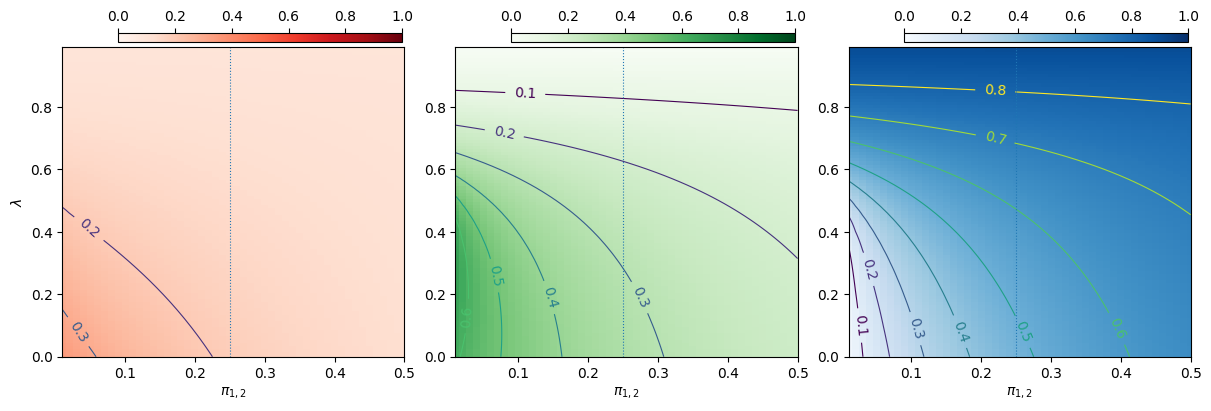

In [3]:
x = 2
pi1, q1, q2 = 0.25, 7, 10
fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(1,3,figsize=(12, 4), constrained_layout=True)
fs_cmaps = ['Reds', 'Greens', 'Blues']

for i in range(3):
    ax[i].set_xlim(0.01, 0.5)
    ax[i].set_ylim(0.00, 0.99)
    ax[i].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

for i,cmap in enumerate(fs_cmaps):
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], vmin =0, vmax =1, cmap=cmap, shading='nearest', rasterized=True)
    con = ax[i].contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
    fig.colorbar(im, ax=ax[i], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
    ax[i].clabel(con)
    ax[i].axvline(0.25, 0, 1, ls=':', lw=0.8)

fig.savefig(f'fs_cmaps_isolines_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.png')

### asymmetric pi as a function of pi2/pi1

In [15]:
def l_change_sol_pi2_eq_0(pi1, q1, q2):
    r1, r2 = 1/q1, 1/q2
    return r2*(pi1+r1-r2)/(pi1*r2 + r1 - r2)

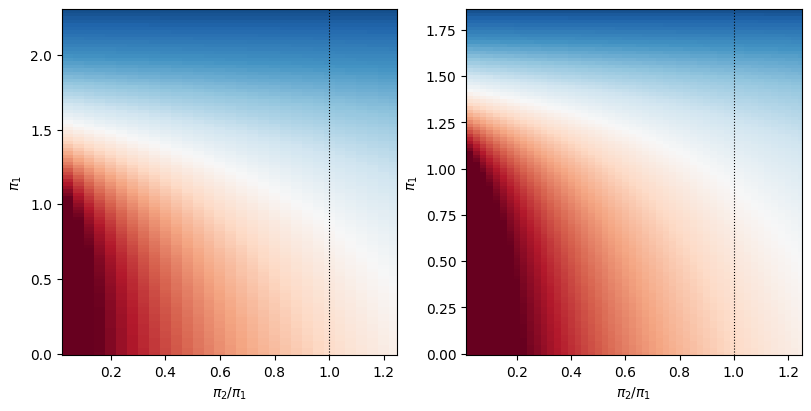

In [16]:
x = 2
q1, q2 = 7, 10

pi1s =[0.25, 0.4]
fig, ax = plt.subplots(1,len(pi1s), figsize=(4*len(pi1s),4), constrained_layout=True)
zLim = [-1, 1]
for i,pi1 in enumerate(pi1s):
    lcs = l_change_sol_pi2_eq_0(pi1, q1, q2)
    fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
    Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
    pi2norm_mesh = fsMesh['x']/pi1
    yvals_mesh = fsMesh['y']/lcs
    # ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1], rasterized=True)
    ax[i].pcolormesh(pi2norm_mesh, yvals_mesh, Qmesh, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1], rasterized=True)
    # ax[i].axvline(pi1, ls=':', color='xkcd:black', lw=0.8)
    ax[i].axvline(1, ls=':', color='xkcd:black', lw=0.8)
    ax[i].set(ylabel=r'$\lambda$', xlabel='$\pi_2$')
    ax[i].set(ylabel=r'$\pi_1$', xlabel='$\pi_2/\pi_1$', xlim=(None, 0.5/max(pi1s)))

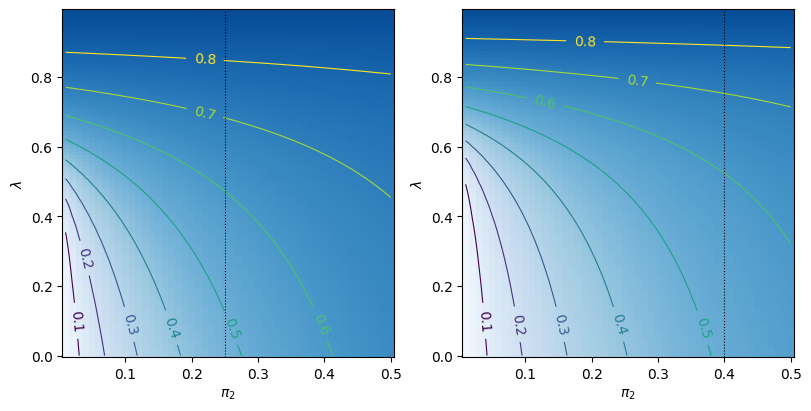

In [22]:
x = 2
q1, q2 = 7, 10

pi1s =[0.25, 0.4]
fig, ax = plt.subplots(1,len(pi1s), figsize=(4*len(pi1s),4), constrained_layout=True)
zLim = [0, 1]
for i,pi1 in enumerate(pi1s):
    lcs = l_change_sol_pi2_eq_0(pi1, q1, q2)
    fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
    pi2norm_mesh = fsMesh['x']/pi1
    yvals_mesh = fsMesh['y']/lcs
    ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][2], cmap='Blues', shading='nearest', vmin=zLim[0], vmax=zLim[1], rasterized=True)
    con = ax[i].contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][2], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
    # ax[i].pcolormesh(pi2norm_mesh, yvals_mesh, fsMesh['fs'][2], cmap='Blues', shading='nearest', vmin=zLim[0], vmax=zLim[1], rasterized=True)
    # con = ax[i].contour(pi2norm_mesh, yvals_mesh, fsMesh['fs'][2], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
    ax[i].clabel(con)
    ax[i].axvline(pi1, ls=':', color='xkcd:black', lw=0.8)
    # ax[i].axvline(1, ls=':', color='xkcd:black', lw=0.8)
    ax[i].set(ylabel=r'$\lambda$', xlabel='$\pi_2$')
    # ax[i].set(ylabel=r'$\lambda/\lambda_c$', xlabel='$\pi_2/\pi_1$', xlim=(None, 0.5/max(pi1s)))

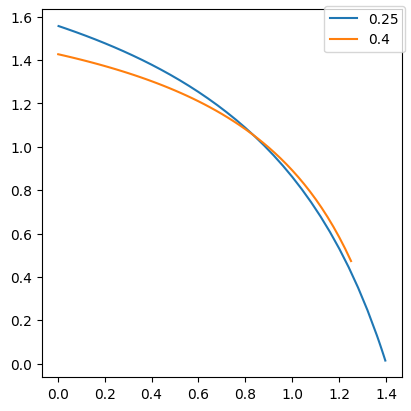

In [18]:
x = 2
q1, q2 = 7, 10
pi1s =[0.25, 0.4]

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
for i,pi1 in enumerate(pi1s):
    lcs = l_change_sol_pi2_eq_0(pi1, q1, q2)
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    tline['pi2n'] = tline['pi2']/pi1
    tline['ln'] = tline['lambda']/lcs
    ax.plot(tline['pi2n'], tline['ln'], label=pi1)
fig.legend()



# Consensus redefined
### Q = f_2 - 2*max(f_0, f_1), f_2 - max(f_0, 2*f_1), ...

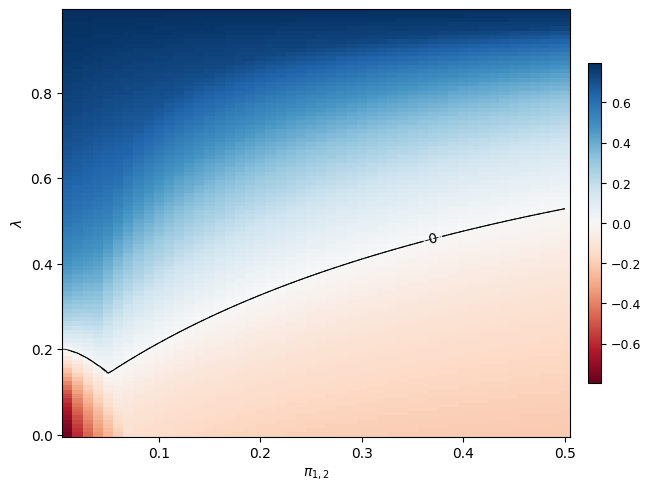

In [5]:
q1, q2, x = 7, 10, 2
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')

# f01 = np.maximum(fsMesh['fs'][0], fsMesh['fs'][1])
# QmodMesh = fsMesh['fs'][2] - x*f01

# f01_avg = np.average(fsMesh['fs'][0:2], axis=0)
# QmodMesh = fsMesh['fs'][2] - x*f01_avg

f0x1 = np.maximum(fsMesh['fs'][0], x*fsMesh['fs'][1])
QmodMesh = fsMesh['fs'][2] - f0x1

maxval = np.max(abs(QmodMesh))
if maxval > 1:
    maxval = 1.0
zLim = [-maxval, maxval]

fig, ax = plt.subplots(constrained_layout=True)
im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], QmodMesh, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1])
# con = ax.contour(fsMesh['x'], fsMesh['y'], QmodMesh, levels=[-0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5], linewidths=0.8, cmap = 'gist_heat')
con = ax.contour(fsMesh['x'], fsMesh['y'], QmodMesh, levels=[0.0, ], linewidths=0.8, cmap = 'gist_heat')
ax.clabel(con)

# tline = pd.read_csv(f'{path}/Tline_Qmod_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
tline = pd.read_csv(f'{path}/Tline_Qmod2_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
# tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
tline = tline.query('pi >= 0.005')
ax.plot(tline['pi'], tline['lambda'], color='xkcd:black', ls='-.', lw=0.6)

ax.set_xlabel('$\pi_{1,2}$')
ax.set_ylabel('$\lambda$')
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)
cb.ax.tick_params(labelsize=9)

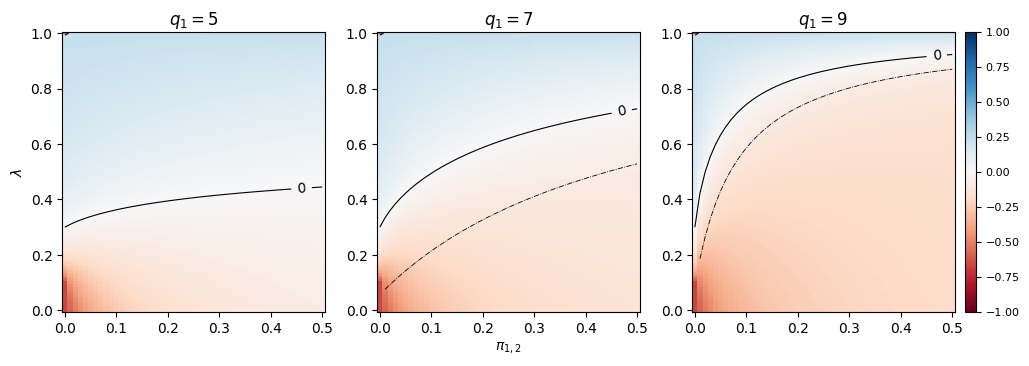

In [5]:
fig, ax = plt.subplots(1,3, figsize=(10.5, 3.5))
q1s, q2 = [5,7,9], 10
x = 2
maxQ = 1 
for i,q1 in enumerate(q1s):
    # fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
    # f01 = np.maximum(fsMesh['fs'][0], fsMesh['fs'][1])
    if not os.path.exists(f'{path}/map_sym_q1_{q1}_q2_{q2}_Amp_pi0_l1.npz'):
        add_pi0_l1_to_sym_mesh(q1, q2)
    fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}_Amp_pi0_l1.npz')
    f01 = np.maximum(fsMesh['fs'][0], fsMesh['fs'][1])
    f01_avg = np.average(fsMesh['fs'][0:2], axis=0)
    # QmodMesh = fsMesh['fs'][2] - x*f01
    # QmodMesh = fsMesh['fs'][2] - x*f01_avg
    QmodMesh = fsMesh['fs'][2] - x/(x+1)
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], QmodMesh, vmin = -maxQ, vmax = maxQ, cmap='RdBu', shading='nearest', rasterized=True)
    con = ax[i].contour(fsMesh['x'], fsMesh['y'], QmodMesh, levels=[0.0, ], linewidths=0.8, cmap = 'gist_heat')
    if i > 0:
        tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
        tline = tline.query('pi >= 0.01')
        ax[i].plot(tline['pi'], tline['lambda'], color='xkcd:black', ls='-.', lw=0.6)
    # ax[i].axhline(3/q2, 0.0, 0.2, ls=':', lw=0.6, color='xkcd:green')
    ax[i].clabel(con)
    ax[i].set_title(rf'$q_1 = {q1}$', pad=5)
ax[1].set_xlabel(r'$\pi_{1,2}$')
ax[0].set_ylabel(r'$\lambda$')
# fig.tight_layout()

# ax[2].text(0.15, 0.3, '$\lambda_c = 3 r_2$', color='xkcd:green')
# Make some room for the colorbar
fig.subplots_adjust(left=0.07, right=0.92, bottom=0.125, top=0.925)
# Add the colorbar outside...
box = ax[2].get_position()
pad, width = 0.01, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=8)

# fig.savefig(f'Qmod_f0f1max_cmap_sym_q1s_q2_{q2}.png')
# fig.savefig(f'Qmod_f0f1avg_cmap_sym_q1s_q2_{q2}.png')
fig.savefig(f'Qmodf2_x_{x}_cmap_sym_q1s_q2_{q2}.png')

### Consensus mod Tlines

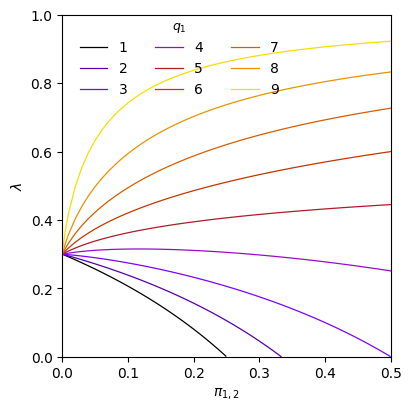

In [31]:
fig, ax = plt.subplots(1,1,figsize=(4,4),constrained_layout=True)

Qversion = 'Qmod'
Qversion = 'Qmodf2'

if Qversion == 'Qmod':
    q1s, q2 = [4,5,6,7,8,9], 10
    legCols = 2
else:
    q1s, q2 = [1,2,3,4,5,6,7,8,9], 10
    legCols = 3

colors = plt.cm.gnuplot(np.linspace(0,0.95,len(q1s)))
x = 2

for q1,c in zip(q1s, colors):
    if Qversion == 'Qmod':
        tline = pd.read_csv(f'{path}/Tline_{Qversion}_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    elif Qversion == 'Qmodf2':
        tline = pd.read_csv(f'{path}/Tline_{Qversion}_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_x_{int(x)}.csv')
    ax.plot(tline['pi'], tline['lambda'], color=c, lw=0.9, label=f'{q1}')
ax.set(xlabel=r'$\pi_{1,2}$', ylabel=r'$\lambda$', xlim=(0,0.5), ylim=(0,1)) 
fig.legend(title=r'$q_1$', title_fontsize=9, loc=(0.18,0.75), frameon=False, ncols=legCols)

# Q = f2 - 2*max(f0,f1)
fig.savefig(f'Tlines_{Qversion}_sym_q2_{q2}_x_{int(x)}.png')

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tline_Qmodf2_sym_pis_q1_1.5_q2_10.0_f2_x_2.csv


/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tline_Qmodf2_sym_pis_q1_2.5_q2_10.0_f2_x_2.csv


/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tline_Qmodf2_sym_pis_q1_3.5_q2_10.0_f2_x_2.csv


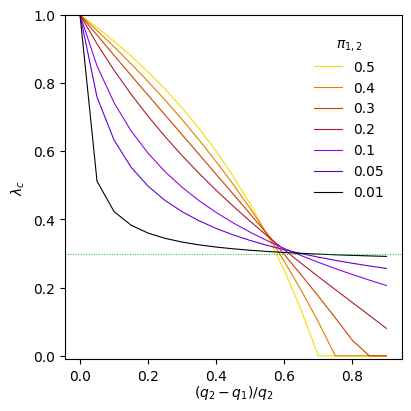

In [33]:
fig, ax = plt.subplots(1,1,figsize=(4,4), constrained_layout=True)
pis = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
colors = list(plt.cm.gnuplot(np.linspace(0,0.95,len(pis))))

Qversion = 'Qmod'
Qversion = 'Qmodf2'

if Qversion == 'Qmod':
    q1s, q2 = np.append(np.arange(4.0, 7.0, 0.5), np.arange(7.0, 10.0, 0.2)), 10.0
    legCols = 1
    QversionCall = 1
elif Qversion == 'Qmodf2':
    q1s, q2 = np.arange(1.0, 10.0, 0.5), 10.0
    legCols = 1
    QversionCall = 2

x = 2
# q1s, q2 = [4.3,4.6]+[i/10 for i in range(50,100,3)], 10.0

q1s = np.around(q1s, 2)
# deltas = [q2-q1 for q1 in q1s]
deltas = [(q2-q1)/q2 for q1 in q1s]
deltas.append(0.0)
pis.reverse(), colors.reverse()
for pi,c in zip(pis, colors):
    lambdas = []
    for q1 in q1s:
        if Qversion == 'Qmod':
            tlineFile = f'Tline_{Qversion}_sym_pis_q1_{q1}_q2_{q2}_f2_{int(x)}f1.csv'
        elif Qversion == 'Qmodf2':
            tlineFile = f'Tline_{Qversion}_sym_pis_q1_{q1}_q2_{q2}_f2_x_{int(x)}.csv'
        if not os.path.exists(f'{path}/{tlineFile}'):
            call(f'python find_Tlines_sym.py {q1} {q2} 2 --Q {QversionCall}', shell=True)
        tline = pd.read_csv(f'{path}/{tlineFile}')
        lamb = float(tline.query('pi == @pi')['lambda'].iloc[0])
        if np.isnan(lamb):
            lambdas.append(0)
        else:
            lambdas.append(lamb)
    lambdas.append(1.0)
    ax.plot(deltas, lambdas, label=f'{pi}', color=c, marker=None, lw=0.8) # markersize=2
ax.set(ylabel=r'$\lambda_c$', ylim=(-0.01,1))
ax.set_xlabel(r'$(q_2 - q_1)/q_2$', labelpad = 0.0)
# ax.axvline(5, ls=':', color='xkcd:black', lw=0.7)
# ax.axvline(0.3333, ls=':', color='xkcd:black', lw=0.7)
ax.axhline(3/q2, 0, 1, ls=':', color='xkcd:green', lw=0.7)
fig.legend(title=r'$\pi_{1,2}$', title_fontsize=10, ncols=1, loc=(0.75, 0.5), frameon=False)
fig.savefig(f'lambdac_{Qversion}_sym_q2_{q2}_x_{int(x)}.png')

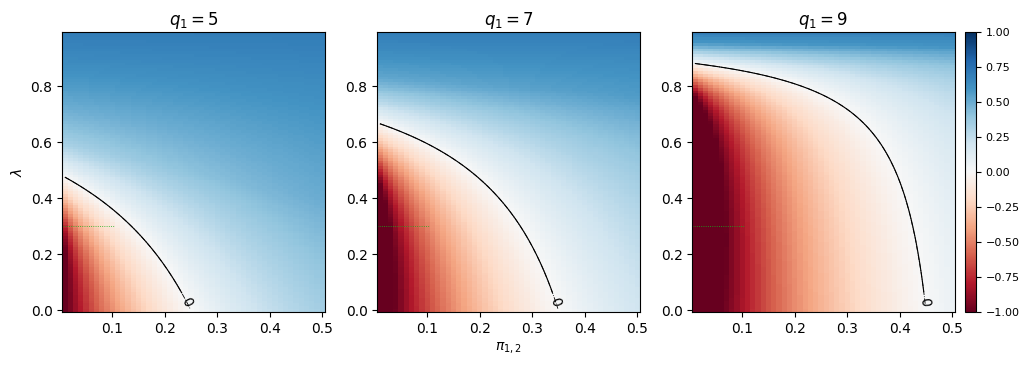

In [27]:
fig, ax = plt.subplots(1,3, figsize=(10.5, 3.5))
q1s, q2 = [5,7,9], 10
pi1 = 0.25
x = 2
maxQ = 1 
for i,q1 in enumerate(q1s):
    # if not os.path.exists(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}_Amp_pi0_l1.npz'):
    #     add_pi0_l1_to_sym_mesh(q1, q2)
    # fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}_Amp_pi0_l1.npz')
    fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
    f01 = np.maximum(fsMesh['fs'][0], fsMesh['fs'][1])
    QmodMesh = fsMesh['fs'][2] - x*f01
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], QmodMesh, vmin = -maxQ, vmax = maxQ, cmap='RdBu', shading='nearest', rasterized=True)
    con = ax[i].contour(fsMesh['x'], fsMesh['y'], QmodMesh, levels=[0.0, ], linewidths=0.8, cmap = 'gist_heat')
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    tline = tline.query('pi2 >= 0.01')
    ax[i].plot(tline['pi2'], tline['lambda'], color='xkcd:black', ls='-.', lw=0.6)
    ax[i].clabel(con)
    ax[i].set_title(rf'$q_1 = {q1}$', pad=5)
ax[1].set_xlabel(r'$\pi_{1,2}$')
ax[0].set_ylabel(r'$\lambda$')
# fig.tight_layout()

# Make some room for the colorbar
fig.subplots_adjust(left=0.07, right=0.92, bottom=0.125, top=0.925)
# Add the colorbar outside...
box = ax[2].get_position()
pad, width = 0.01, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=8)

fig.savefig(f'Qmod_cmap_asym_fixPi1_{pi1}_q1s_q2_{q2}.png')